In [71]:
import pandas as pd
import numpy as np
import os
from utils import base

features = [
    'x',
    'y',
    'z',
    'roll',
    'pitch',
    'yaw',
    'thumb',
    'forefinger',
    'middle_finger',
    'ring_finger',
    'little_finger',
    ]


In [2]:
#path = "./tctodd/"
path = "../../Desktop/MML Project/tctodd/"
dirs = os.listdir(path=path)
weeks = sorted([i for i in dirs if i != ".DS_Store"])
filenames = sorted(os.listdir(path+weeks[1]))

data = []
labels = dict()
label_cnt = 0

for w in weeks:
    temp_path = path+w+"/"
    filenames = sorted(os.listdir(temp_path))
    for fn in filenames:
        label = fn.split('.')[0][:-2]
        
        if label not in labels:
            labels[label] = label_cnt
            label_cnt += 1
            
        data.append({'label':labels[label], 'time_series':pd.read_csv(temp_path+fn, header=None, sep='\t',).values})
        

In [3]:
df = pd.DataFrame(data, columns=['label', 'time_series'])

In [4]:
df['length'] = df['time_series'].apply(lambda x: x.shape[0])

<AxesSubplot: xlabel='label', ylabel='length'>

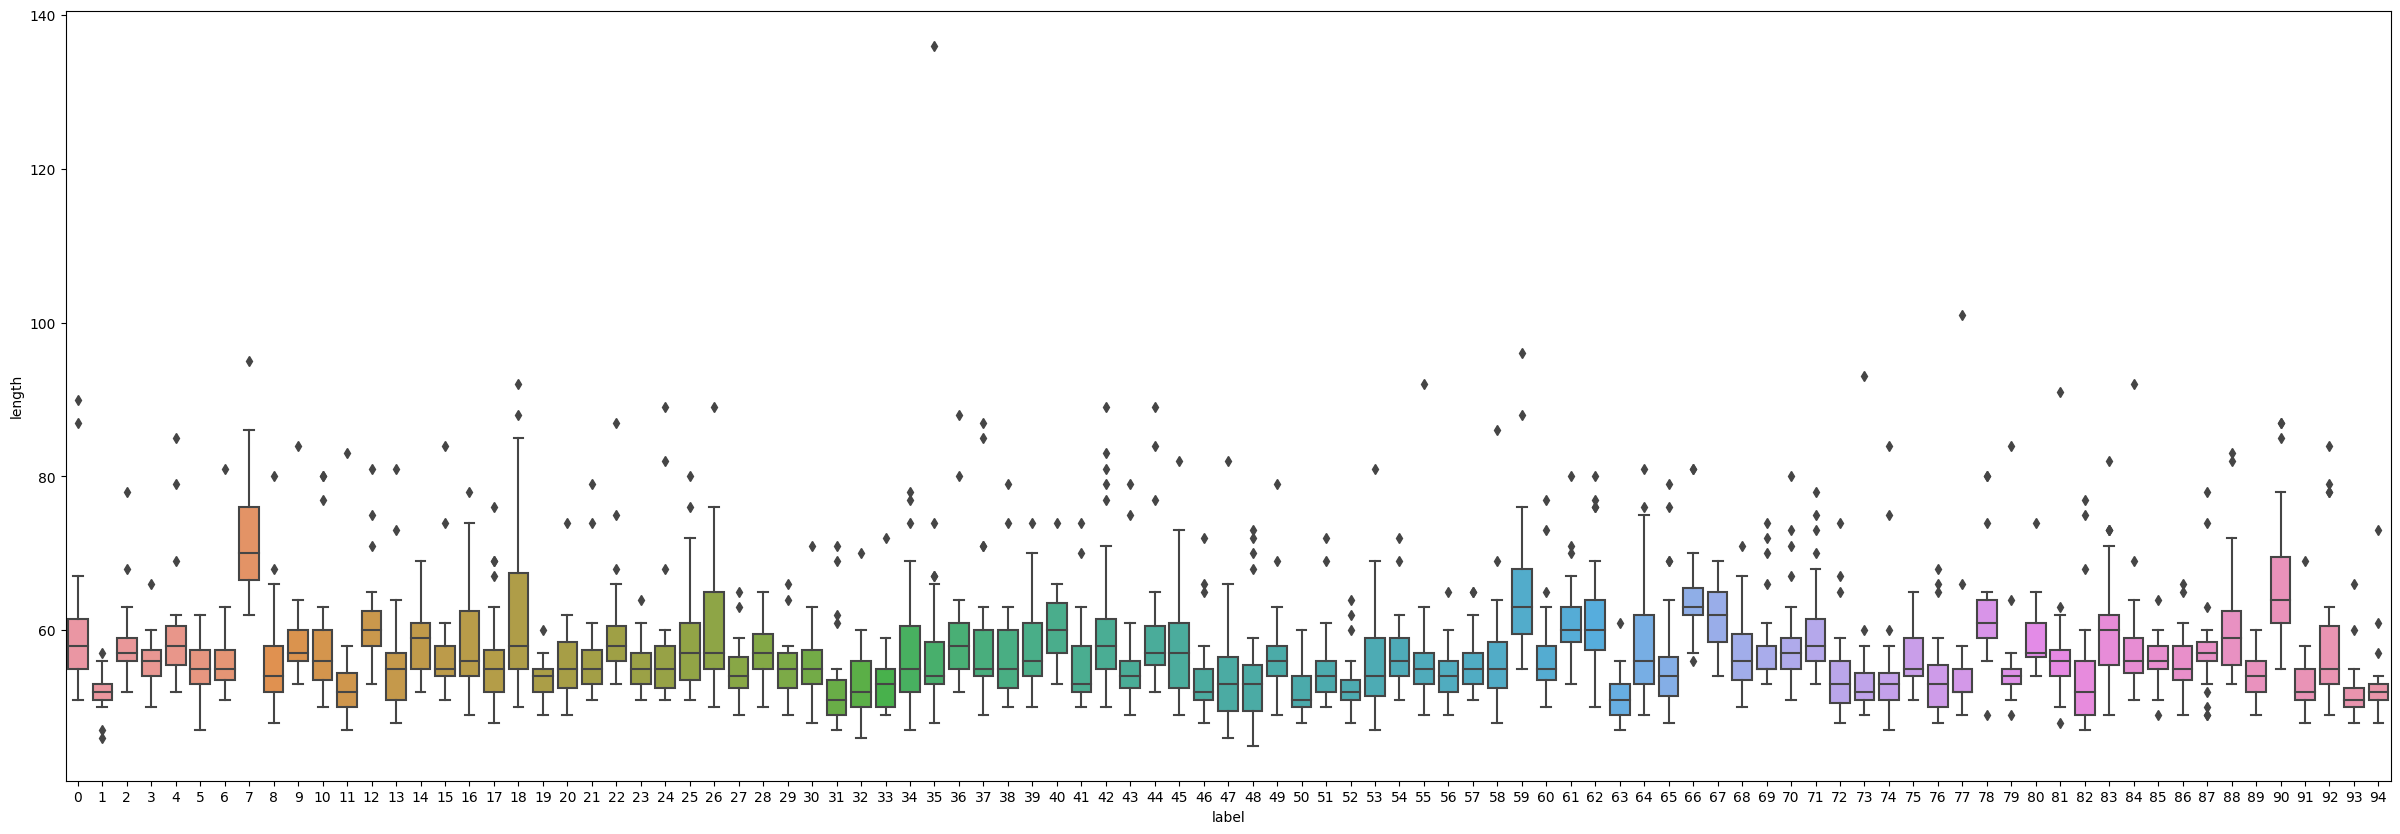

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
sns.boxplot(x=df["label"], y=df["length"])

<AxesSubplot: xlabel='length', ylabel='Count'>

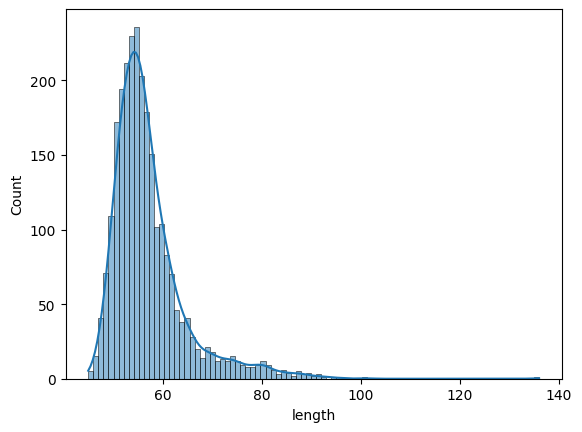

In [12]:
sns.histplot(data=df, x="length", kde=True)

In [39]:
classes_std = df.groupby('label').std()

In [40]:
classes_std['length'].argmin(), classes_std['length'].min(), 

(1, 2.449489742783178)

In [41]:
classes_std['length'].argmax(), classes_std['length'].max(), 

(35, 16.544423493067043)

In [61]:
inv = {v:k for k,v in labels.items()}
print(f'+ sbilanciata: {inv[35]}, - sbilanciata: {inv[1]}')

+ sbilanciata: hurry, - sbilanciata: I


In [43]:
df.groupby(['label'])['length'].min()[35], df.groupby(['label'])['length'].max()[35], df.groupby(['label'])['length'].mean()[35], df.groupby(['label'])['length'].std()[35]

(48, 136, 59.22222222222222, 16.544423493067043)

In [51]:
index = (df['length']).argmax()
sx, dx = df.iloc[index]['time_series'][:, :3], df.iloc[index]['time_series'][:, 11:14]

In [59]:
dx[:,0]

array([0.075964, 0.077527, 0.065516, 0.053952, 0.030287, 0.056765,
       0.048013, 0.015776, 0.040199, 0.020196, 0.017562, 0.03761 ,
       0.002247, 0.037208, 0.016312, 0.020554, 0.018098, 0.010641,
       0.052746, 0.054934, 0.056229, 0.056184, 0.055827, 0.049487,
       0.049755, 0.052478, 0.065382, 0.065159, 0.064668, 0.045111,
       0.044531, 0.043771, 0.044843, 0.045111, 0.044084, 0.045468,
       0.045468, 0.044664, 0.045424, 0.045602, 0.045111, 0.04654 ,
       0.046049, 0.045557, 0.046674, 0.045959, 0.04587 , 0.047299,
       0.046629, 0.046317, 0.046183, 0.04462 , 0.044486, 0.044441,
       0.059622, 0.064846, 0.064846, 0.062435, 0.062123, 0.062926,
       0.062033, 0.062167, 0.062078, 0.059444, 0.059935, 0.059667,
       0.057702, 0.058551, 0.056095, 0.051049, 0.050514, 0.048236,
       0.0452  , 0.04462 , 0.044575, 0.04337 , 0.051094, 0.045647,
       0.042566, 0.043905, 0.045602, 0.04395 , 0.04337 , 0.044575,
       0.045245, 0.048549, 0.055113, 0.046763, 0.047254, 0.050

---------------------------------------

In [65]:
X = np.vstack(df['time_series'])

IndexError: index 22 is out of bounds for axis 1 with size 22

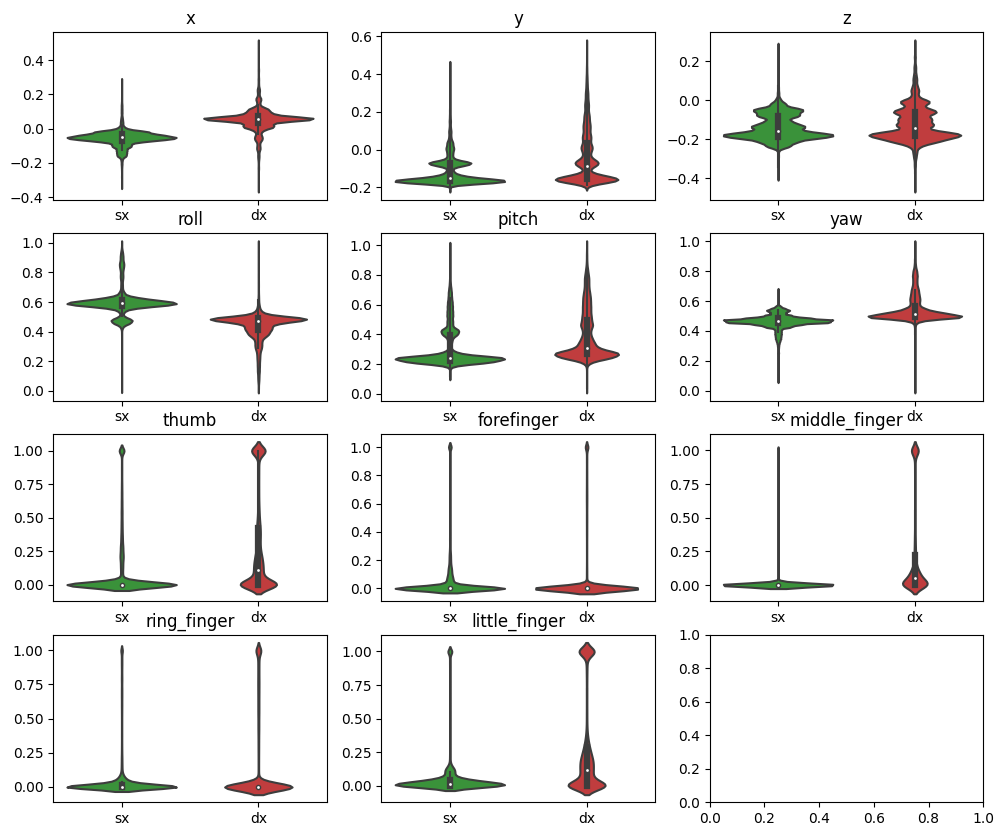

In [73]:
fig, ax = plt.subplots(4,3, figsize=(12,10))

pred_counter = 0
for i in range(4):
    for j in range(3):
        x_sx, x_dx = X[:,pred_counter], X[:,pred_counter+ 11]
        df = pd.DataFrame({'sx': x_sx, 'dx': x_dx})
        ax[i,j].set_title(features[pred_counter])
        sns.violinplot(data=df, ax=ax[i,j], palette=['tab:green', 'tab:red'])
        pred_counter +=1


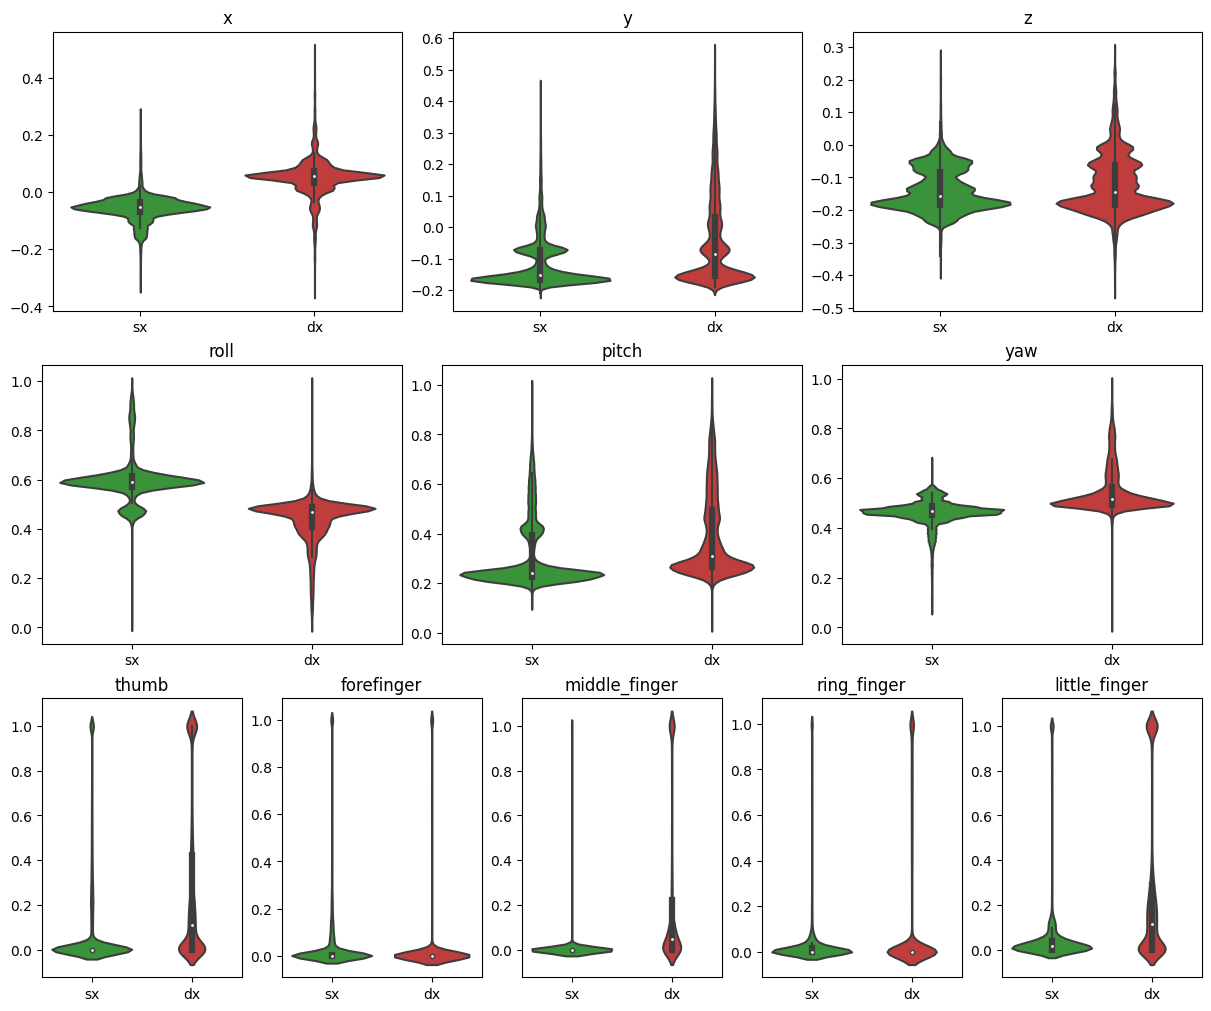

In [74]:
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
fig = plt.figure(figsize=(12,10), constrained_layout=True)
gs = GridSpec(3, 1, figure=fig)
gs1 = GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[0])
for n in range(3):
    x_sx, x_dx = X[:,n], X[:,n+ 11]
    df = pd.DataFrame({'sx': x_sx, 'dx': x_dx})
    ax = fig.add_subplot(gs1[n])
    ax.set_title(features[n])
    sns.violinplot(data=df, ax=ax, palette=['tab:green', 'tab:red'])
gs2 = GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[1])
for n in range(3):
    x_sx, x_dx = X[:,n+3], X[:,n+ 11+3]
    df = pd.DataFrame({'sx': x_sx, 'dx': x_dx})
    ax = fig.add_subplot(gs2[n])
    ax.set_title(features[n+3])
    sns.violinplot(data=df, ax=ax, palette=['tab:green', 'tab:red'])
gs3 = GridSpecFromSubplotSpec(1, 5, subplot_spec=gs[2])
for n in range(5):
    x_sx, x_dx = X[:,n+3+3], X[:,n+ 11+3+3]
    df = pd.DataFrame({'sx': x_sx, 'dx': x_dx})
    ax = fig.add_subplot(gs3[n])
    ax.set_title(features[n+3+3])
    sns.violinplot(data=df, ax=ax, palette=['tab:green', 'tab:red'])
plt.show()

## mean, std_dev, max, min analysis of one-handed, two-handed, double-handed signs

In [1]:
import pandas as pd
import numpy as np
import os
#from utils import base

features = [
    'sx_x',
    'sx_y',
    'sx_z',
    'sx_roll',
    'sx_pitch',
    'sx_yaw',
    'sx_thumb',
    'sx_forefinger',
    'sx_middle_finger',
    'sx_ring_finger',
    'sx_little_finger',
    'dx_x',
    'dx_y',
    'dx_z',
    'dx_roll',
    'dx_pitch',
    'dx_yaw',
    'dx_thumb',
    'dx_forefinger',
    'dx_middle_finger',
    'dx_ring_finger',
    'dx_little_finger'
    ]



#path = "../../Desktop/MML Project/tctodd/"
path = "/Users/lorenzo/Documents/Lorenzo/Università/Magistrale/I anno/01_Mathematics in ML/Project/auslan/auslan-classification/tctodd/"
dirs = os.listdir(path=path)
weeks = sorted([i for i in dirs if i != ".DS_Store"])
filenames = sorted(os.listdir(path+weeks[1]))

data = []
labels = dict()
label_cnt = 0

for w in weeks:
    temp_path = path+w+"/"
    filenames = sorted(os.listdir(temp_path))
    for fn in filenames:
        label = fn.split('.')[0][:-2]
        
        if label not in labels:
            labels[label] = label_cnt
            label_cnt += 1
            
        data.append({'label':labels[label], 'time_series':pd.read_csv(temp_path+fn, header=None, sep='\t',).values})
        

df = pd.DataFrame(data, columns=['label', 'time_series'])

In [2]:
df['length'] = df.time_series.apply(lambda x: x.shape[0])

In [3]:
length = df.length
X = df.time_series
y = df.label

In [4]:
X_stack = np.vstack(X)
df_X = pd.DataFrame(X_stack, columns=features)
df_X.describe().T[['min','max', 'mean', 'std']]

,min,max,mean,std
sx_x,-0.342182,0.284053,-0.055462,0.043212
sx_y,-0.210003,0.451930,-0.113013,0.079858
sx_z,-0.397100,0.279580,-0.138106,0.065494
sx_roll,0.003024,0.997842,0.598195,0.088800
sx_pitch,0.118787,0.993448,0.307559,0.132904
sx_yaw,0.063674,0.674636,0.463156,0.052315
sx_thumb,0.000000,1.000000,0.089838,0.229754
sx_forefinger,0.000000,1.000000,0.052772,0.170532
sx_middle_finger,0.000000,1.000000,0.030192,0.145386
sx_ring_finger,0.000000,1.000000,0.055055,0.180508


In [5]:
one = labels['hello'] # one-handed
two = labels['God'] #two-handed
spec_two = labels['where'] #specular two-handed

one_mask = df['label'] == one
two_mask = df['label'] == two
spec_two_mask = df['label'] == spec_two

one_data = df[one_mask].iloc[0]['time_series']
two_data = df[two_mask].iloc[0]['time_series']
spec_two_data = df[spec_two_mask].iloc[0]['time_series']

In [6]:
one_data_df = pd.DataFrame(one_data, columns=features)
two_data_df = pd.DataFrame(two_data, columns=features)
spec_two_data_df = pd.DataFrame(spec_two_data, columns=features)

In [7]:
statistics = ['mean', 'std', 'min', 'max']

In [8]:
one_data_df.describe().T[statistics]

,mean,std,min,max
sx_x,-0.095157,0.011256,-0.110274,-0.082993
sx_y,-0.114560,0.001866,-0.117760,-0.109544
sx_z,-0.043235,0.001383,-0.045661,-0.040303
sx_roll,0.488890,0.001408,0.485852,0.492114
sx_pitch,0.396866,0.002876,0.391842,0.404465
sx_yaw,0.504347,0.000917,0.502438,0.506992
sx_thumb,0.444965,0.021496,0.398975,0.483431
sx_forefinger,0.000000,0.000000,0.000000,0.000000
sx_middle_finger,0.000000,0.000000,0.000000,0.000000
sx_ring_finger,0.000000,0.000000,0.000000,0.000000


In [9]:
two_data_df.describe().T[statistics]

,mean,std,min,max
sx_x,-0.123599,0.061440,-0.167157,0.019613
sx_y,0.020048,0.021672,-0.012699,0.090933
sx_z,-0.045307,0.021422,-0.062360,0.007249
sx_roll,0.472134,0.082416,0.422410,0.649138
sx_pitch,0.535066,0.023012,0.478735,0.636772
sx_yaw,0.494913,0.016948,0.453957,0.513242
sx_thumb,0.175449,0.364302,0.000000,1.000000
sx_forefinger,0.198119,0.389687,0.000000,1.000000
sx_middle_finger,0.179472,0.374644,0.000000,1.000000
sx_ring_finger,0.204055,0.384140,0.000000,1.000000


In [10]:
spec_two_data_df.describe().T[statistics]

,mean,std,min,max
sx_x,-0.142578,0.037534,-0.308162,-0.101433
sx_y,0.014393,0.027037,-0.048419,0.091380
sx_z,0.007375,0.021108,-0.008869,0.066232
sx_roll,0.520836,0.173724,0.432041,0.927467
sx_pitch,0.505567,0.023239,0.465990,0.582278
sx_yaw,0.513758,0.017083,0.452199,0.555565
sx_thumb,0.589177,0.211794,0.086619,0.781711
sx_forefinger,0.080587,0.050537,0.000000,0.175464
sx_middle_finger,0.000000,0.000000,0.000000,0.000000
sx_ring_finger,0.000640,0.002134,0.000000,0.013791
